# Analysis of Variance: ANOVA
- Testing groups to see if there’s a difference between them
- One-Way or Two-Way Mean:
  - One-way has one independent variable 
    - Used to test two groups to see if there’s a difference between them 
    - Will tell if at least two groups are different from each other, but won’t tell what groups were different
  - Two-way has two independent variables
    - Without replication: Double-testing the same group: Before and After treatment
    - With replication: Two groups doing more than one thing (Two different Treatments)
- Groups or Levels:
  - Groups or levels are different groups in the same independent variable

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Using built-in datset morely
- 100 observations of 3 Varibales
- 5 experiments, each consisting of 20 consecutive 'runs' 
- The response is the speed of light measurement

In [3]:
head(morley)

,Expt,Run,Speed
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850


## Use Boxplot to look at each of 5 experiments
- Conduct Analysis of Variance across each experiment

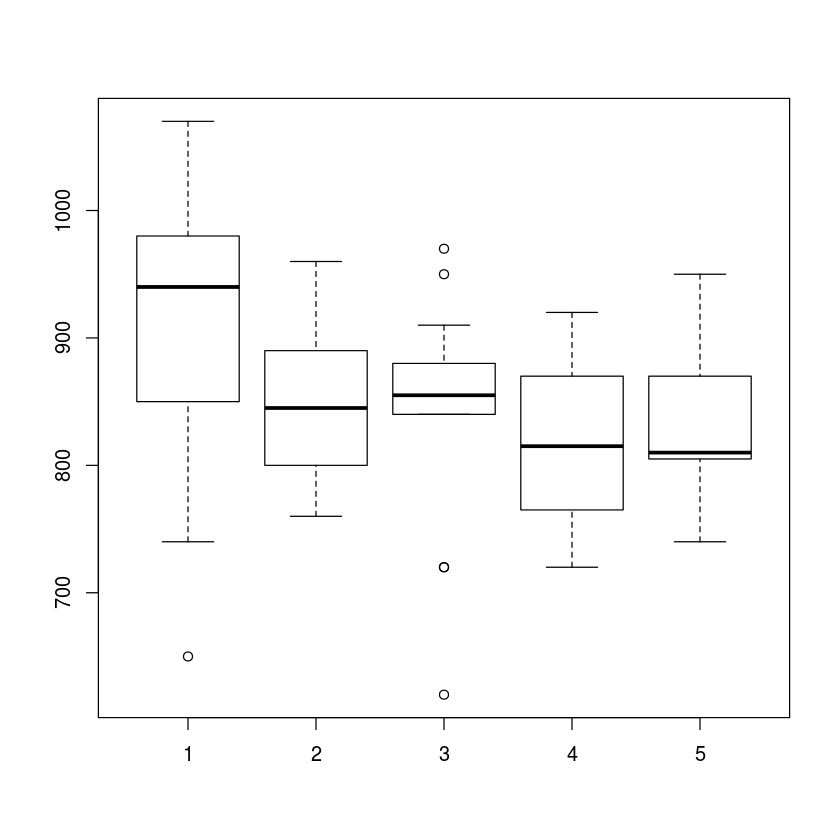

In [4]:
boxplot(Speed ~ Expt, data = morley)

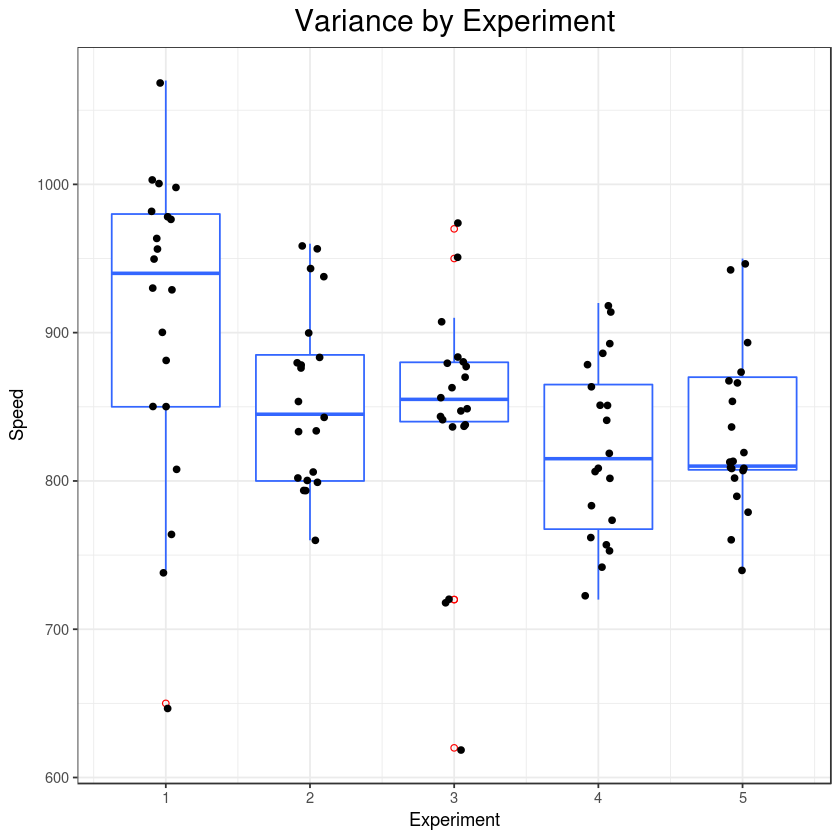

In [5]:
# Using ggplot2
morley %>%
  ggplot(aes(x = Expt, y = Speed, group = Expt)) +
  geom_boxplot(fill = "white", colour = "#3366FF", outlier.colour = "red", outlier.shape = 1) +
  geom_jitter(width = 0.1) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18)) +
  ggtitle("Variance by Experiment") +
  xlab("Experiment")

## Perform Analysis of Variance on the dataset
- anova of Speed and Experiment
- Pr(>F) = 0.000483
- The Mean from different experiments was not the same

In [6]:
a <- aov(Speed ~ Expt, data = morley)
summary(a)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Expt         1  72581   72581   13.04 0.000483 ***
Residuals   98 545444    5566                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Look at normal plot of residuals qqplot and normal line qqline
- Not a perfect fit

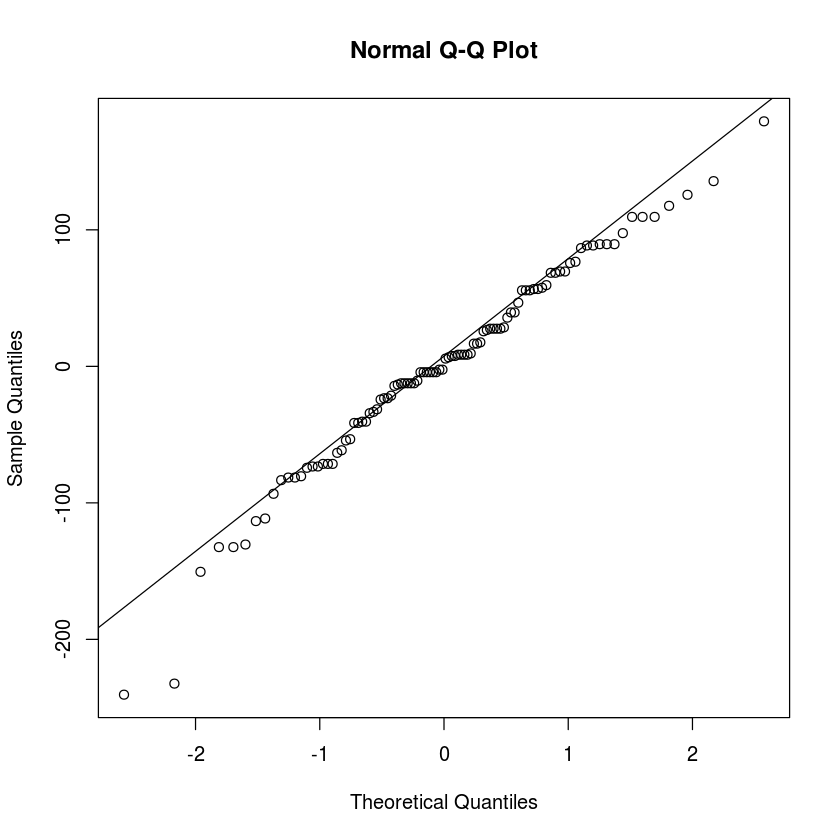

In [7]:
qqnorm(residuals(a))
qqline(residuals(a))

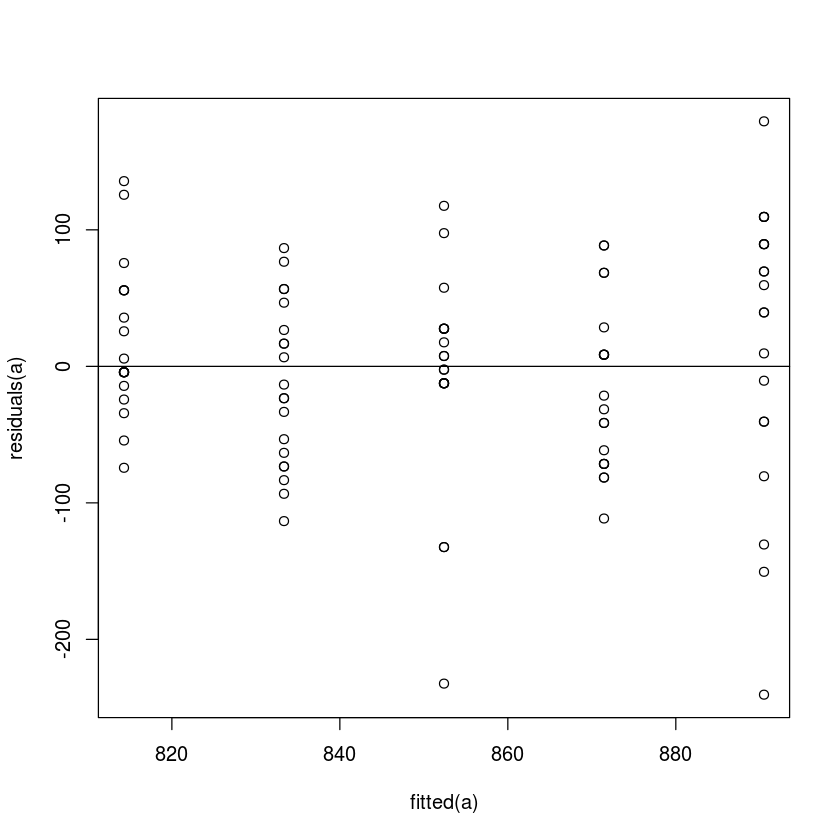

In [8]:
# Plot fitted values vs residuals
plot(fitted(a), residuals(a))
abline(h = 0)

<hr>

# Perform TukeyHSD test

In [9]:
# Look at number of observations in each Experiment 
table(morley$Expt)


 1  2  3  4  5 
20 20 20 20 20 

In [10]:
# Run Anova with Expt as a factor (for TukeyHSD test)
a <- aov(Speed ~ factor(Expt), data = morley)
summary(a)

             Df Sum Sq Mean Sq F value  Pr(>F)   
factor(Expt)  4  94514   23629   4.288 0.00311 **
Residuals    95 523510    5511                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Run TukeyHSD to see where differences exist
- Bigest difference is between '2-1', '3-1', '4-1', and '5-1'
- Smaller p adj between 1.  Higher for the rest
- 1 is the Outlier

In [11]:
TukeyHSD(a)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Speed ~ factor(Expt), data = morley)

$`factor(Expt)`
     diff        lwr        upr     p adj
2-1 -53.0 -118.28006  12.280058 0.1679880
3-1 -64.0 -129.28006   1.280058 0.0574625
4-1 -88.5 -153.78006 -23.219942 0.0025733
5-1 -77.5 -142.78006 -12.219942 0.0115793
3-2 -11.0  -76.28006  54.280058 0.9899661
4-2 -35.5 -100.78006  29.780058 0.5571665
5-2 -24.5  -89.78006  40.780058 0.8343360
4-3 -24.5  -89.78006  40.780058 0.8343360
5-3 -13.5  -78.78006  51.780058 0.9784065
5-4  11.0  -54.28006  76.280058 0.9899661


### Look at the Boxplot

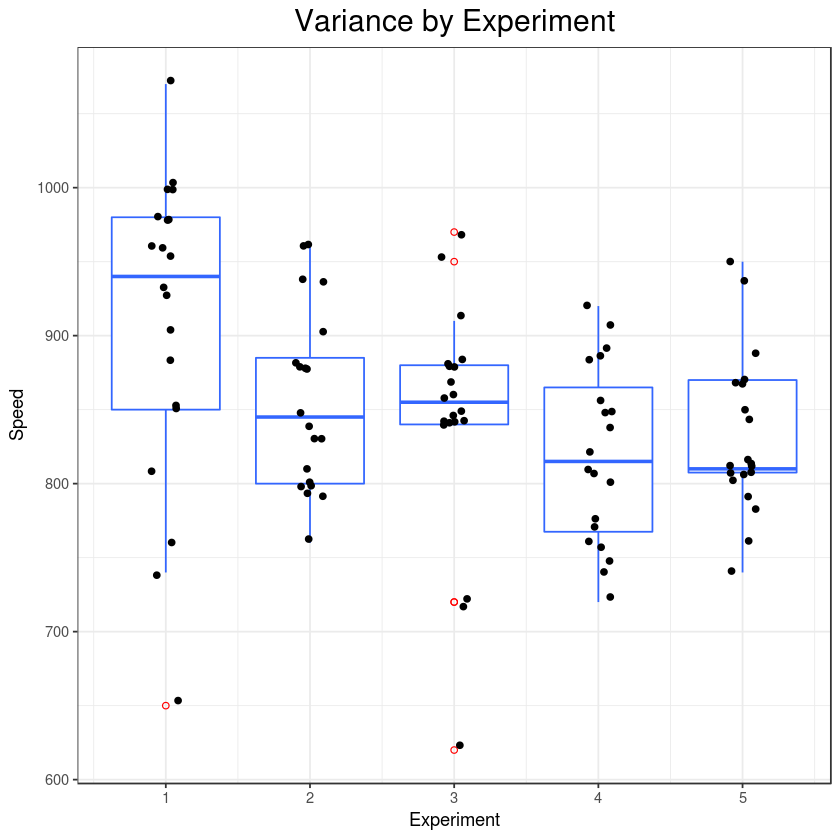

In [12]:
morley %>%
  ggplot(aes(x = Expt, y = Speed, group = Expt)) +
  geom_boxplot(fill = "white", colour = "#3366FF", outlier.colour = "red", outlier.shape = 1) +
  geom_jitter(width = 0.1) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size=18)) +
  ggtitle("Variance by Experiment") +
  xlab("Experiment")

### Plot TukeyHSD test results

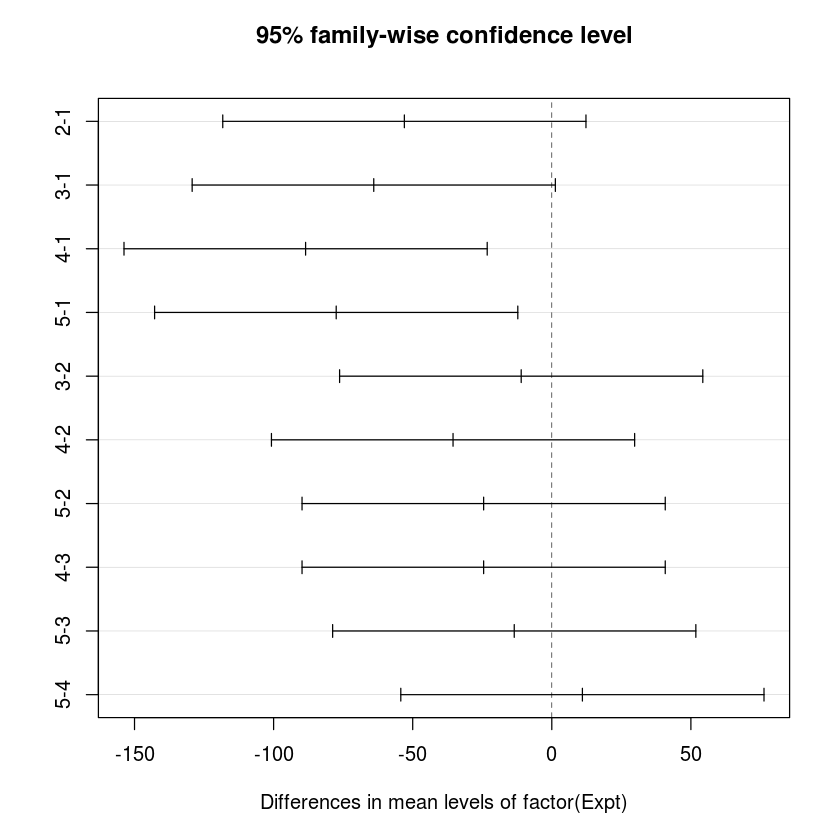

In [13]:
plot(TukeyHSD(a))